# 12： Amplitute versus Offset (AVO)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14
plt.rcParams['font.family']='arial'

<div class="alert alert-block alert-success">
<b>Learning Objectives:</b>
<ul>
    <li>Zeoppritz Equation</li>
    <li>Aki-Richard approximation to Zeoppritz Equation</li>
    <li>Intercept and gradient</li>
</ul>
</div>

## Zeoppritz Equation
The isotropic and elastic behaviour of a P wave incident on a boundary at any angle is described by the Zoeppritz (1919) equations, Aki and Richards (1980) give the results in the following convenient matrix form 

$
\left(\begin{array}{cccc}\downarrow \uparrow & \downarrow \uparrow & \uparrow \uparrow & \uparrow \uparrow \\ \mathrm{PP} & \mathrm{SP} & \mathrm{PP} & \mathrm{SP} \\ \downarrow \uparrow & \downarrow \uparrow & \uparrow \uparrow & \uparrow \uparrow \\ \mathrm{PS} & \mathrm{SS} & \mathrm{PS} & \mathrm{SS} \\ \downarrow \downarrow & \downarrow \downarrow & \uparrow \downarrow & \uparrow \downarrow \\ \mathrm{PP} & \mathrm{SP} & \mathrm{PP} & \mathrm{SP} \\ \downarrow \downarrow & \downarrow \downarrow & \uparrow \downarrow & \uparrow \downarrow \\ \mathrm{PS} & \mathrm{SS} & \mathrm{PS} & \mathrm{SS}\end{array}\right)=\mathbf{M}^{-1} \mathbf{N}
$

where each matrix element is a reflection or transmission coefficient for displacement
amplitudes. The first letter designates the type of incident wave, and the second letter
designates the type of reflected or transmitted wave. The arrows indicate downward ↓
and upward ↑ propagation, so that a combination ↑↓ indicates a reflection coefficient,
while a combination ↓↓ indicates a transmission coefficient. 
The matrices M and N are given by

$
M=\left(\begin{array}{cccc}-\sin \theta_{1} & -\cos \theta_{\mathrm{S} 1} & \sin \theta_{2} & \cos \theta_{\mathrm{S} 2} \\ \cos \theta_{1} & -\sin \theta_{\mathrm{S} 1} & \cos \theta_{2} & -\sin \theta_{\mathrm{S} 2} \\ 2 \rho_{1} V_{\mathrm{S} 1} \sin \theta_{\mathrm{S} 1} \cos \theta_{1} & \rho_{1} V_{\mathrm{S} 1}\left(1-2 \sin ^{2} \theta_{\mathrm{S} 1}\right) & 2 \rho_{2} V_{\mathrm{S} 2} \sin \theta_{\mathrm{S} 2} \cos \theta_{2} & \rho_{2} V_{\mathrm{S} 2}\left(1-2 \sin ^{2} \theta_{\mathrm{S} 2}\right) \\ -\rho_{1} V_{\mathrm{P} 1}\left(1-2 \sin ^{2} \theta_{\mathrm{S} 1}\right) & \rho_{1} V_{\mathrm{S} 1} \sin 2 \theta_{\mathrm{S} 1} & \rho_{2} V_{\mathrm{P} 2}\left(1-2 \sin ^{2} \theta_{\mathrm{S} 2}\right) & -\rho_{2} V_{\mathrm{S} 2} \sin 2 \theta_{\mathrm{S} 2}\end{array}\right)
$


$
\mathrm{N}=\left(\begin{array}{cccc}\sin \theta_{1} & \cos \theta_{\mathrm{S} 1} & -\sin \theta_{2} & -\cos \theta_{\mathrm{S} 2} \\ \cos \theta_{1} & -\sin \theta_{\mathrm{S} 1} & \cos \theta_{2} & -\sin \theta_{\mathrm{S} 2} \\ 2 \rho_{1} V_{\mathrm{S} 1} \sin \theta_{\mathrm{s} 1} \cos \theta_{1} & \rho_{1} V_{\mathrm{S} 1}\left(1-2 \sin ^{2} \theta_{\mathrm{S} 1}\right) & 2 \rho_{2} V_{\mathrm{S} 2} \sin \theta_{\mathrm{S} 2} \cos \theta_{2} & \rho_{2} V_{\mathrm{S} 2}\left(1-2 \sin ^{2} \theta_{\mathrm{S} 2}\right) \\ \rho_{1} V_{\mathrm{P} 1}\left(1-2 \sin ^{2} \theta_{\mathrm{S} 1}\right) & -\rho_{1} V_{\mathrm{S} 1} \sin 2 \theta_{\mathrm{S} 1} & -\rho_{2} V_{\mathrm{P} 2}\left(1-2 \sin ^{2} \theta_{\mathrm{S} 2}\right) & \rho_{2} V_{\mathrm{S} 2} \sin 2 \theta_{\mathrm{S} 2}\end{array}\right)
$

$\theta$ and $\theta_s$ are the angles of P- and S-wave propagation,respectively. 
As we can see,  the Zoeppritz equations are complicated and do not give an intuitive feel for how rock properties impact the change of amplitude with angle. So simpler approximations are required.

## Aki-Richard approximation to Zeoppritz Equation
Aki and Richards (1980) also derived a simplified form by assuming small layer
contrasts. The results are conveniently expressed in terms of contrasts in VP, VS, and ρ as
follows

$
R_{pp}(\theta)=\frac{1}{2}\left(\frac{\Delta \rho}{\bar{\rho}}+\frac{\Delta V_{p}}{\bar{V}_{p}}\right)-2\left(\frac{\bar{V}_{S}}{\bar{V}_{p}}\right)^{2}\left(\frac{\Delta \rho}{\bar{\rho}}+\frac{2 \Delta V_{S}}{\bar{V}_{S}}\right) \sin ^{2}(\theta)+\frac{\Delta V_{p}}{2 \bar{V}_{p}} \tan ^{2}(\theta)
$

$
\Delta \rho=\rho_2-\rho_1, \overline{\rho} = \frac{\rho_1+\rho_2}{2}, \Delta V_p=V_{p2}-V_{p1}, \Delta V_s=V_{s2}-V_{s1}
$

$
\overline{V_p}=\frac{V_{p1}+V_{p2}}{2}, \overline{V_s}=\frac{V_{s1}+V_{s2}}{2}
$

In [2]:
def PP_ref(theta, vp1,vp2,vs1,vs2,den1,den2):
    """Aki-Richard approximation to PP reflectivity. Written by Jiaxin Yu (July 2021)

    Args:
        theta (degree): incident angle
        vp1 (m/s): P wave velocity of layer 1
        vp2 (m/s): P wave velocity of layer 2
        vs1 (m/s): S wave velocity of layer 1
        vs2 (m/s): S wave velocity of layer 2
        den1 (kg/m3): density of layer 1
        den2 (kg/m3): density of layer 2

    Returns:
        R_pp: P wave reflectivity
    """   
    theta=np.deg2rad(theta) # convert angle in degree to angle in radian
    delta_den=den2-den1
    delta_vp=vp2-vp1
    delta_vs=vs2-vs1
    rho_mean=0.5*(den1+den2)
    vp_mean=0.5*(vp1+vp2)
    vs_mean=0.5*(vs1+vs2)
    
    Rpp0=0.5*(delta_den/rho_mean+delta_vp/vp_mean)
    M= -2*(vs_mean/vp_mean)**2*(2*delta_vs/vs_mean+delta_den/rho_mean)
    N= 0.5* delta_vp/vp_mean
    R_pp= Rpp0+ M *np.sin(theta)**2 + N * np.tan(theta)**2
    return R_pp

## Intercept and gradient

The expression is equivelent to:

$
R_{pp}(\theta)=\frac{1}{2}(\frac{\Delta \rho}{\bar \rho}+\frac{\Delta V_p}{\bar{V_p}})+\left [ \frac{\Delta V_p}{2\bar{V_p}}-2\left ( \frac{\bar{V_s}}{\bar{V_p}} \right  ) 
^2\ \left ( \frac{\Delta \rho}{\bar \rho}+\frac{2\Delta V_S}{\bar V_s} \right )  \right ] \sin^2\theta +\frac{1}{2}\frac{\Delta V_p}{\bar{V_p}}(\tan^2\theta-\sin^2\theta)
$

and this can be written as three-term form:

$
R_{PP}(\theta)\approx R_{P0}+B \sin^{2} \theta+C(\tan^{2} \theta-\sin ^{2} \theta)
$

where $R_{P0}$ represents the zero offset P wave section, B describes the variation at intermediate offsets and is often called the AVO gradient, and C dominates at far offsets near the critical angle, it controls the turning point for the angle dependent reflectivity at medium to large angles close to critical angle if it exists.

When assume small incident angle, the three-term approximation can be reduced to two-term approximation:
$
R_{PP}(\theta)\approx R_{P0}+B \sin^{2} \theta
$


In [3]:
def R_G(vp1,vp2,vs1,vs2,den1,den2):
    """Compute gradient and intercept based on two term approximation, Written by Jiaxin Yu (July 2021)
    Args:
        vp1 (m/s): P wave velocity of layer 1
        vp2 (m/s): P wave velocity of layer 2
        vs1 (m/s): S wave velocity of layer 1
        vs2 (m/s): S wave velocity of layer 2
        den1 (kg/m3): density of layer 1
        den2 (kg/m3): density of layer 2

    Returns:
        R: intercept
        G: gradient
    """  
    delta_den=den2-den1
    delta_vp=vp2-vp1
    delta_vs=vs2-vs1
    rho_mean=0.5*(den1+den2)
    vp_mean=0.5*(vp1+vp2)
    vs_mean=0.5*(vs1+vs2)
    
    R=0.5*(delta_den/rho_mean+delta_vp/vp_mean)
    G= 0.5*delta_vp/vp_mean-2*(vs_mean/vp_mean)**2*(2*delta_vs/vs_mean+delta_den/rho_mean)
    
    return R,G

## Example
Assume constant vertical velocity in the overburden above a horizontal reflector. The reflector shown  represent a clayrich overburden overlying a thick water saturated sandstone. The elastic properties of the clay are as below. Calculate the P-to-P reflectivity of the clay-wet sand interface for the angles up to 90 degree.

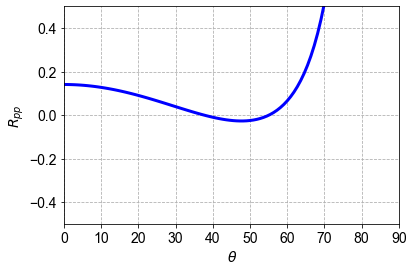

In [11]:
# the clay rich layer is denoted as 1 and the wet sandstone layer is denoted as 2
vp1=2190 
vs1=716
den1=2118
vp2=2760
vs2=1473
den2=2229
theta=np.linspace(0,90,100)
R_pp=PP_ref(theta, vp1,vp2,vs1,vs2,den1,den2)
# plot
plt.plot(theta,R_pp,'b-',lw=3)
plt.ylim(-0.5,0.5)
plt.xlim(0,90)
plt.xlabel(' $\\theta$ ')
plt.ylabel('$R_{pp}$')
plt.xticks(np.arange(min(theta), max(theta)+1, 10))
plt.grid(ls='--')


<div class="alert alert-block alert-info">
<b>Reference:</b> Mavko, G., Mukerji, T. and Dvorkin, J., 2020. The rock physics handbook. Cambridge university press.
</div>